<a href="https://colab.research.google.com/github/vishwanaik15/CIFAR-10/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline
from torch import nn
import torch.nn.functional as F
import torch.optim as optim


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Images Shape :  (3, 32, 32)


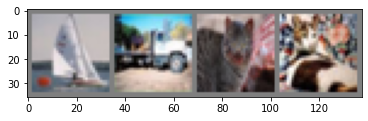

 ship truck   cat   cat


In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# image shape
image_shape = images.numpy().shape[1:]
print("Images Shape : ", image_shape)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [7]:
import torch.nn as nn
import torch.nn.functional as F


class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net2 = Net2()
net2 = net2.to(device)

In [82]:
import torch.nn as nn
import torch.nn.functional as F


class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3,padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3,padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3,padding=1)
        self.fc1 = nn.Linear(64 * 4 * 4, 500)
        self.fc2 = nn.Linear(500, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net3 = Net3()
net3 = net3.to(device)

In [106]:
import torch.nn as nn
import torch.nn.functional as F


class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5, padding=4)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 18, 5, padding=4)
        self.conv3 = nn.Conv2d(18, 30, 5,padding=4)
        self.conv4 = nn.Conv2d(30, 48, 5,padding=4)
        self.fc1 = nn.Linear(48 * 5 * 5, 500)
        self.fc2 = nn.Linear(500, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 48 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net4 = Net4()
net4 = net4.to(device)

In [11]:
def choose_loss_function(lf):
  if lf == "BCE":
    return nn.BCELoss()
  elif lf == "BCEwL":
    return nn.BCEWithLogitsLoss()
  elif lf == "NLL":
    return nn.NLLLoss()
  elif lf == "CE":
    return nn.CrossEntropyLoss()

In [52]:
learning_rate = 0.01

def choose_optimiser(net, optimiser):

  if optimiser == "Adam":
    return optim.Adam(net.parameters(), lr=learning_rate)
  elif optimiser == "Adamax":
    return optim.Adamax(net.parameters(), lr=learning_rate)
  elif optimiser == "ASGD":
    return optim.ASGD(net.parameters(), lr=learning_rate)
  elif optimiser == "LBFGS":
    return optim.LBFGS(net.parameters(), lr=learning_rate)
  elif optimiser == "RMSprop":
    return  optim.RMSprop(net.parameters(), lr=learning_rate)
  elif optimiser == "Rprop":
    return  optim.Rprop(net.parameters(), lr=learning_rate)
  elif optimiser == "SGD":
    return optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

In [53]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net2.parameters(), lr=0.001, momentum=0.9)

In [54]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.199
[1,  4000] loss: 1.219
[1,  6000] loss: 1.213
[1,  8000] loss: 1.194
[1, 10000] loss: 1.204
[1, 12000] loss: 1.191
[2,  2000] loss: 1.090
[2,  4000] loss: 1.111
[2,  6000] loss: 1.112
[2,  8000] loss: 1.101
[2, 10000] loss: 1.111
[2, 12000] loss: 1.115
Finished Training


In [55]:
def choose_model(model):
  if model == "Net2":
    return Net2()
  elif model == "Net3":
    return Net3()
  elif model == "Net4":
    return Net4()

In [56]:
PATH = './cifar_net.pth'
torch.save(net2.state_dict(), PATH)

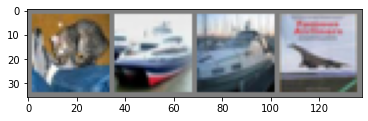

GroundTruth:    cat  ship  ship plane


In [57]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [58]:
net2 = Net2()
net2.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [59]:
outputs = net2(images)

In [60]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [62]:
outputs = model(images)

In [63]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %


In [66]:
class_correct = list(0 for i in range(10))
class_total = list(0 for i in range(10))
class_accuracy = list(0 for i in range(10))

def accuracy_of_classes(net, dataloader):
  with torch.no_grad():
    for data in dataloader:
      images, labels = data
      outputs = net2(images)
      _, predicted = torch.max(outputs, 1)
      c = (predicted == labels).squeeze()
      for i in range(4):
        label = labels[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1

  for i in range(10):
    class_accuracy[i] = 100 * class_correct[i] / class_total[i]
    print('Accuracy of %5s : %2d %%' %(classes[i], 100 * class_correct[i] / class_total[i]))

In [67]:
accuracy_of_classes(model, testloader)

Accuracy of plane : 59 %
Accuracy of   car : 75 %
Accuracy of  bird : 45 %
Accuracy of   cat : 53 %
Accuracy of  deer : 51 %
Accuracy of   dog : 33 %
Accuracy of  frog : 60 %
Accuracy of horse : 71 %
Accuracy of  ship : 79 %
Accuracy of truck : 65 %


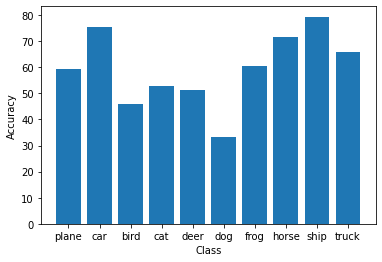

In [68]:
plt.bar(classes, class_accuracy)
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.show()

In [90]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net3.parameters(), lr=0.001)

In [91]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.849
[1,  4000] loss: 1.513
[1,  6000] loss: 1.388
[1,  8000] loss: 1.319
[1, 10000] loss: 1.215
[1, 12000] loss: 1.154
[2,  2000] loss: 1.064
[2,  4000] loss: 1.038
[2,  6000] loss: 1.042
[2,  8000] loss: 1.001
[2, 10000] loss: 0.993
[2, 12000] loss: 0.997
Finished Training


In [94]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the 3 layer network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the 3 layer network on the 10000 test images: 66 %


In [101]:
class_correct = list(0 for i in range(10))
class_total = list(0 for i in range(10))
class_accuracy = list(0 for i in range(10))

def accuracy_of_classes(net, dataloader):
  with torch.no_grad():
    for data in dataloader:
      images, labels = data
      outputs = net3(images)
      _, predicted = torch.max(outputs, 1)
      c = (predicted == labels).squeeze()
      for i in range(4):
        label = labels[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1

  for i in range(10):
    class_accuracy[i] = 100 * class_correct[i] / class_total[i]
    print('Accuracy of %5s : %2d %%' %(classes[i], 100 * class_correct[i] / class_total[i]))

In [102]:
accuracy_of_classes(model, testloader)

Accuracy of plane : 69 %
Accuracy of   car : 83 %
Accuracy of  bird : 60 %
Accuracy of   cat : 48 %
Accuracy of  deer : 49 %
Accuracy of   dog : 51 %
Accuracy of  frog : 76 %
Accuracy of horse : 69 %
Accuracy of  ship : 87 %
Accuracy of truck : 69 %


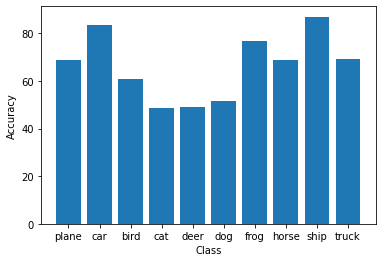

In [103]:
plt.bar(classes, class_accuracy)
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.show()

In [112]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net4.parameters(), lr=0.001,momentum=0.9)

In [113]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.296
[1,  4000] loss: 1.256
[1,  6000] loss: 1.263
[1,  8000] loss: 1.238
[1, 10000] loss: 1.250
[1, 12000] loss: 1.235
[2,  2000] loss: 1.193
[2,  4000] loss: 1.190
[2,  6000] loss: 1.184
[2,  8000] loss: 1.199
[2, 10000] loss: 1.193
[2, 12000] loss: 1.201
Finished Training


In [114]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the 4 layer network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the 4 layer network on the 10000 test images: 66 %
